In [5]:
import pandas as pd
import itertools
import string
import numpy as np
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn import metrics
import matplotlib as plt

%matplotlib inline

pd.set_option('display.max_rows',None)

In [6]:
df = pd.read_csv('data/drugsComTrain_raw.tsv',sep='\t')


In [7]:
df.head()

Unnamed: 0                  drugName                     condition  \
0      206461                 Valsartan  Left Ventricular Dysfunction   
1       95260                Guanfacine                          ADHD   
2       92703                    Lybrel                 Birth Control   
3      138000                Ortho Evra                 Birth Control   
4       35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating  \
0  "It has no side effect, I take it in combinati...     9.0   
1  "My son is halfway through his fourth week of ...     8.0   
2  "I used to take another oral contraceptive, wh...     5.0   
3  "This is my first time using any form of birth...     8.0   
4  "Suboxone has completely turned my life around...     9.0   

                date  usefulCount  
0       May 20, 2012           27  
1     April 27, 2010          192  
2  December 14, 2009           17  
3   November 3, 2015           10  
4  November 27, 2016           37

In [8]:
df.condition.value_counts()

condition
Birth Control                                                          28788
Depression                                                              9069
Pain                                                                    6145
Anxiety                                                                 5904
Acne                                                                    5588
Bipolar Disorde                                                         4224
Insomnia                                                                3673
Weight Loss                                                             3609
Obesity                                                                 3568
ADHD                                                                    3383
Diabetes, Type 2                                                        2554
Emergency Contraception                                                 2463
High Blood Pressure                                               

In [9]:
df_train = df[(df['condition']=='Birth Control') | (df['condition']=='Depression') | (df['condition']=='High Blood Pressure') | (df['condition']=='Diabetes, Type 2')]
x = df_train.drop(['Unnamed: 0','drugName','rating','date','usefulCount'],axis=1)

In [10]:
x.head()

condition                                             review
2   Birth Control  "I used to take another oral contraceptive, wh...
3   Birth Control  "This is my first time using any form of birth...
9   Birth Control  "I had been on the pill for many years. When m...
11     Depression  "I have taken anti-depressants for years, with...
14  Birth Control  "Started Nexplanon 2 months ago because I have...

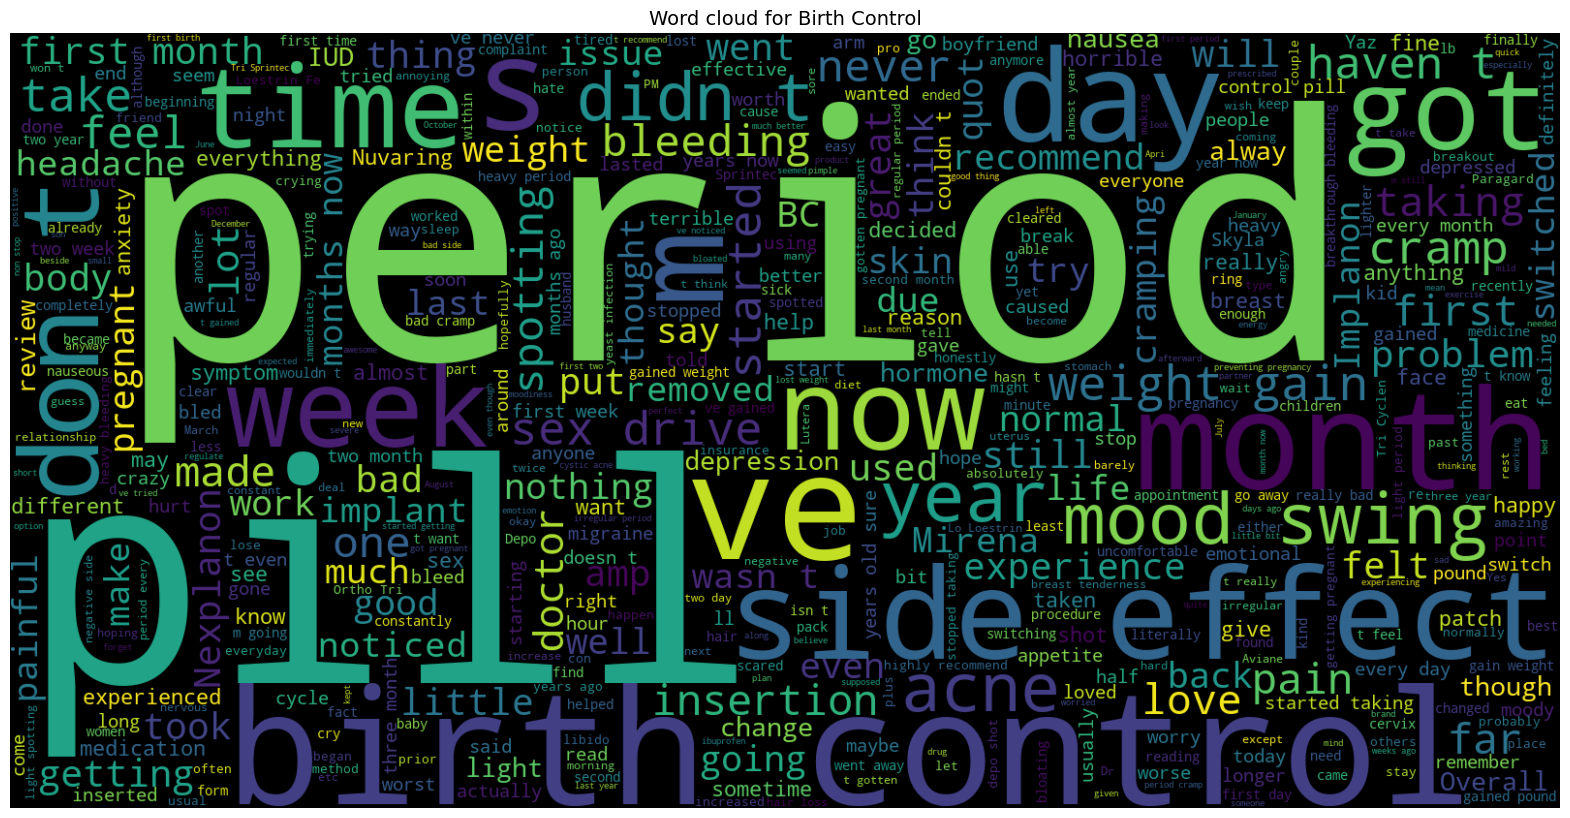

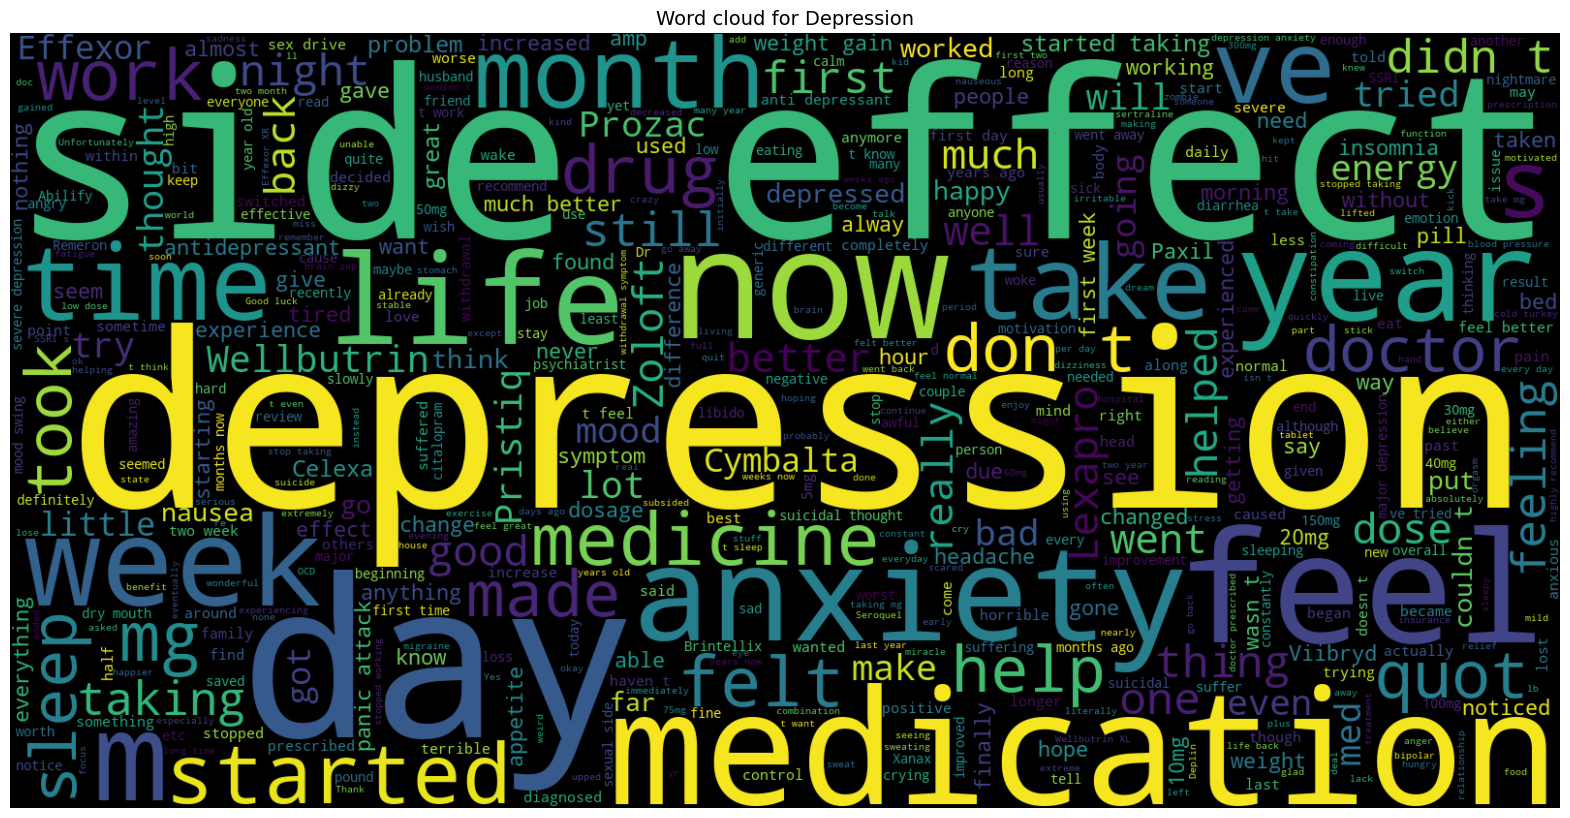

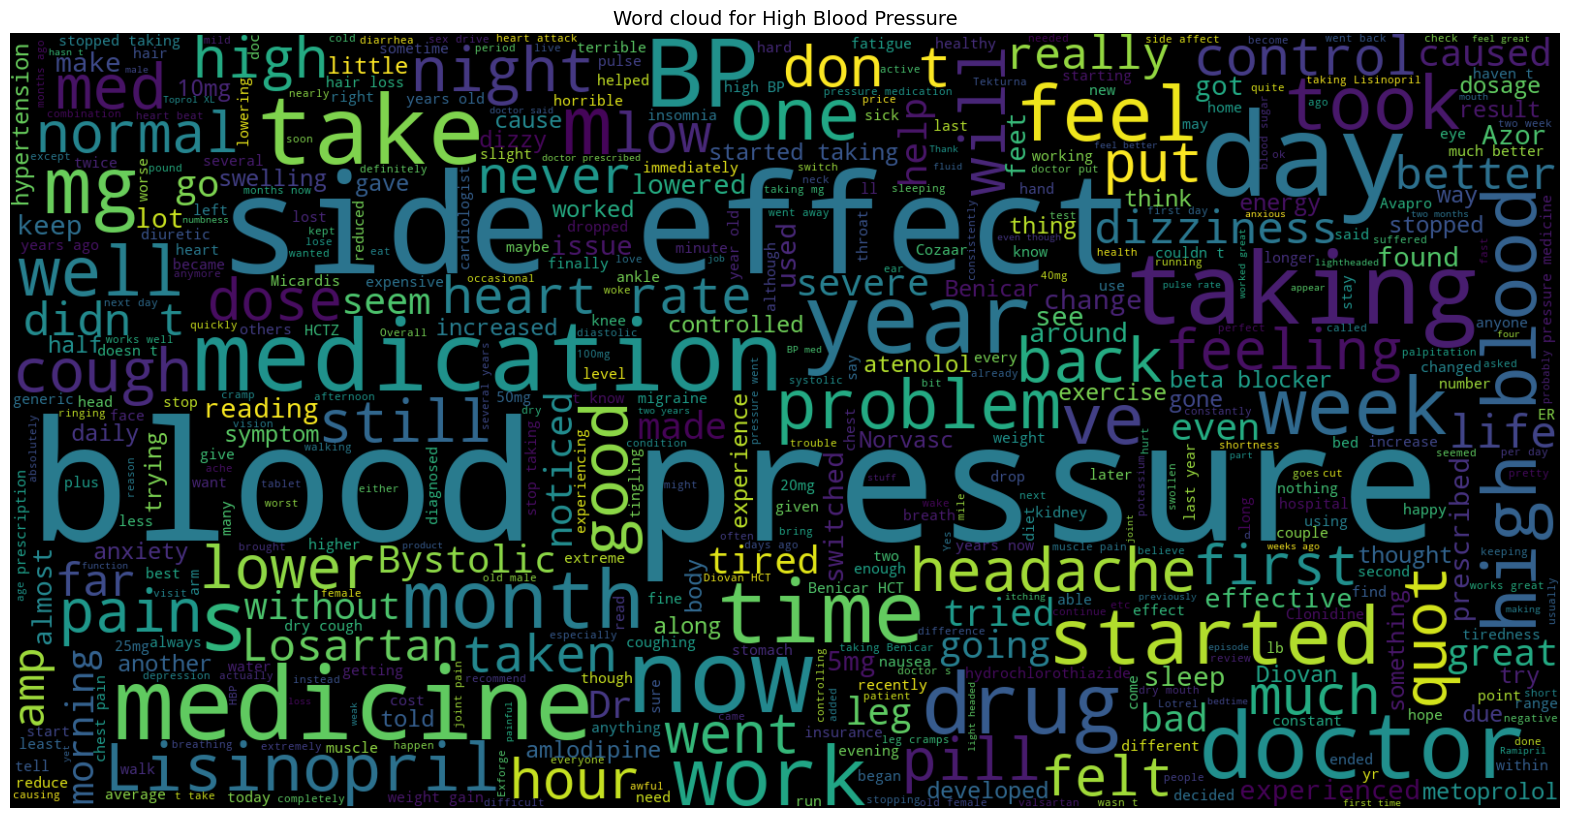

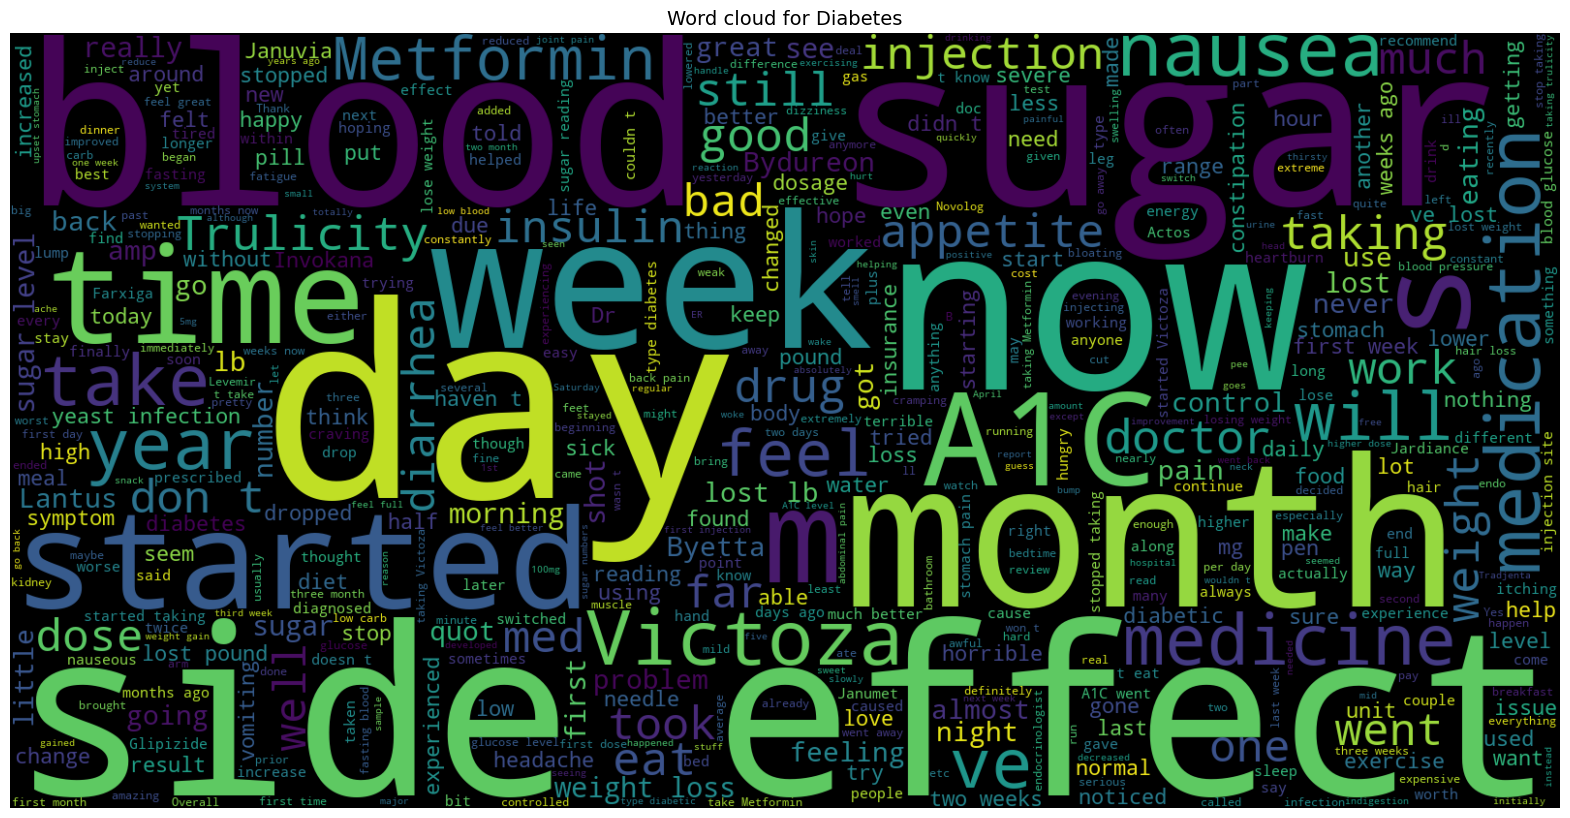

In [11]:
x_birth = x[x['condition']=='Birth Control']
x_dep = x[x['condition']=='Depression']
x_bp = x[x['condition']=='High Blood Pressure']
x_diab = x[x['condition']=='Diabetes, Type 2']

import matplotlib.pyplot as plt
from wordcloud import WordCloud

#Birth Control word frequency displayed
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(x_birth.review))

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Birth Control', fontsize=14)
plt.axis('off')  # Optional: turn off axis numbers

plt.show()

#Depression word count displayed
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(x_dep.review))

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Depression', fontsize=14)
plt.axis('off')  # Optional: turn off axis numbers

plt.show()

#High Blood Pressure word frequency
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(x_bp.review))

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for High Blood Pressure', fontsize=14)
plt.axis('off')  # Optional: turn off axis numbers

plt.show()

#Diabetes word frequency
wc = WordCloud(max_words=500, width=1600, height=800).generate(" ".join(x_diab.review))

plt.figure(figsize=(20, 20))
plt.imshow(wc, interpolation='bilinear')
plt.title('Word cloud for Diabetes', fontsize=14)
plt.axis('off')  # Optional: turn off axis numbers

plt.show()


In [34]:

for i,col in enumerate(x.columns):
    x.iloc[:,i] = x.iloc[:,i].str.replace('"','')

pd.set_option('max_colwidth',None)

import nltk
#nltk.download()

from nltk.corpus import stopwords
stop = stopwords.words('english')

from nltk.stem import WordNetLemmatizer
lemmetizer = WordNetLemmatizer()

from bs4 import BeautifulSoup
import re

def review_to_words(raw_review):
    review_text = BeautifulSoup(raw_review,'html.parser').get_text()
    letters_only = re.sub('[^a-zA-Z] ','',review_text)
    words = letters_only.lower().split()
    meaningful_words=[w for w in words if not w in stop]
    lemmetized_words=[lemmetizer.lemmatize(w) for w in meaningful_words]
    cleaned_output = " ".join(lemmetized_words)
    return cleaned_output

x['review_clean'] = x['review'].apply(review_to_words)
x.head()


/var/folders/09/ctwsqpsd37g5fwsnk2rn_qpr0000gp/T/ipykernel_27923/450574763.py:19: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  review_text = BeautifulSoup(raw_review,'html.parser').get_text()
